# Importing Libraries

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [186]:
cardio_df = pd.read_csv('C:/Users/g500/Desktop/PythonFinal/CardioTrain.csv',sep=';')
cardio_df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


# Dataset Insights

In [187]:
cardio_df.shape

(70000, 13)

In [188]:
cardio_df.columns.values 

array(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype=object)

In [189]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Summary Statistics

In [190]:
cardio_df.describe() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Understanding Target variable

In [191]:
#unique values of target variable cardio
cardio_df.cardio.unique() 

array([0, 1], dtype=int64)

In [192]:
#frequency of the unique values in the target variable cardio
cardio_df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

### To check for missing values

In [193]:
print("There are {} missing values in the data frame".format(cardio_df.isnull().sum().sum()))

There are 0 missing values in the data frame


### To check for duplicate rows

In [194]:
cardio_df.duplicated().sum()

0

In [195]:
print("There are {} duplicated values in the data frame".format(cardio_df.duplicated().sum()))

There are 0 duplicated values in the data frame


### Renaming the columns

In [196]:
cardio_df.rename(columns={'ap_hi': 'systolic_BP', 'ap_lo': 'diastolic_BP'}, inplace=True)
cardio_df

,id,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Coverting age from days to years
## Featuring a new variable BMI
- BMI gives more insight as it measures 
  body size considering weight as well as height 

In [197]:
cardio_df['ageinYears']=  (cardio_df['age'] / 365.25).round()
cardio_df['bmi']=(cardio_df['weight']/((cardio_df['height']/100)**2)).round(2)
cardio_df

,id,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio,ageinYears,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53.0,26.93
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62.0,50.47
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.0,31.35
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.0,27.10


## Removing irrelevant columns

In [198]:
cardio_df=cardio_df.drop(['id','age'],axis=1)
#cardio_df

## To filter inaccurate/ incorrect data

- The data for variables systolic_BP, diastolic_BP, height and BMI should lie within the acceptable range 

In [199]:
indexNames = cardio_df[  (cardio_df['systolic_BP']<50)|(cardio_df['systolic_BP']>240)|\
                         (cardio_df['diastolic_BP']<35)|(cardio_df['diastolic_BP']>150)|\
                         (cardio_df['height']<140)| (cardio_df['height']>207)|\
                         (cardio_df['bmi']>50)|(cardio_df['bmi']<17)].index
cardio_df.drop(indexNames , inplace=True)
cardio_df

,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio,ageinYears,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.97
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.93
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.51
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.71
4,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,165,80.0,150,80,1,1,0,0,1,1,58.0,29.38
69995,2,168,76.0,120,80,1,1,1,0,1,0,53.0,26.93
69997,2,183,105.0,180,90,3,1,0,1,0,1,52.0,31.35
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.0,27.10


In [200]:
#cardio_df.describe()

## Lower Bound and Upper Bound for continuous variables

In [201]:
from numpy import percentile
m=[cardio_df.ageinYears,cardio_df.height,cardio_df.weight,cardio_df.systolic_BP,cardio_df.diastolic_BP,cardio_df.bmi]
k=["ageinYears","height","weight",'systolicBP','diastolicBP','bmi']
l=0
for i in m:
    quartiles = percentile(i, [25, 50, 75])
    IQR=quartiles[2]-quartiles[0]
    LB=quartiles[0]-1.5*IQR
    UB=quartiles[2]+1.5*IQR
    print("Lower Bound and Upper Bound for", k[l],':',LB,"and",UB)
    l=l+1

Lower Bound and Upper Bound for ageinYears : 33.0 and 73.0
Lower Bound and Upper Bound for height : 142.5 and 186.5
Lower Bound and Upper Bound for weight : 39.5 and 107.5
Lower Bound and Upper Bound for systolicBP : 90.0 and 170.0
Lower Bound and Upper Bound for diastolicBP : 65.0 and 105.0
Lower Bound and Upper Bound for bmi : 14.519999999999996 and 39.480000000000004


## Boxplot for continuous variables

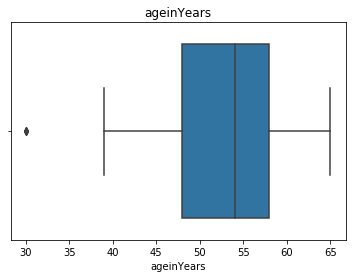

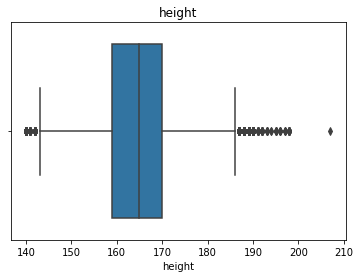

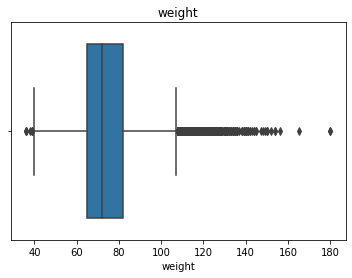

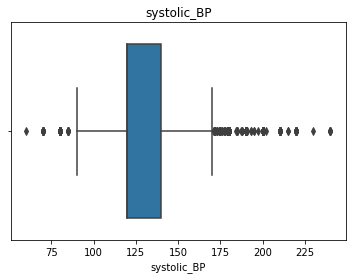

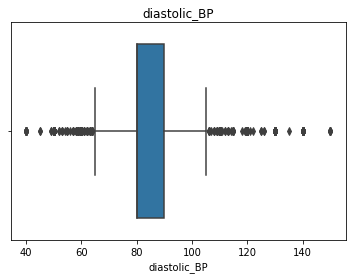

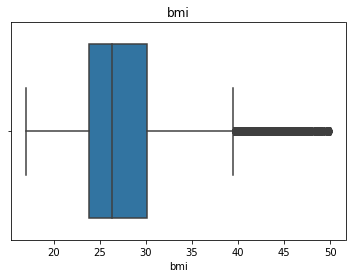

In [202]:
k=["ageinYears","height","weight","systolic_BP","diastolic_BP","bmi"]
m=0
for m in range(len(k)):
    sns.boxplot(x=k[m],data =cardio_df).set_title(k[m])
    plt.show()

## Bivariate analysis using Scatterplot
- 1.BMI and weight and 
- 2.BMI and height


## Scatterplot of BMI and weight

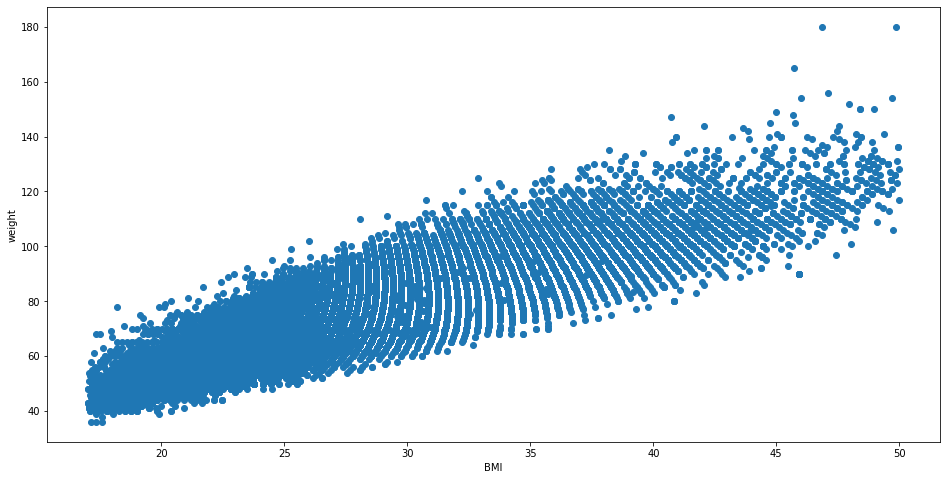

In [203]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(cardio_df['bmi'], cardio_df['weight'])
ax.set_xlabel('BMI')
ax.set_ylabel('weight')
plt.show()

## Scatterplot of BMI and height

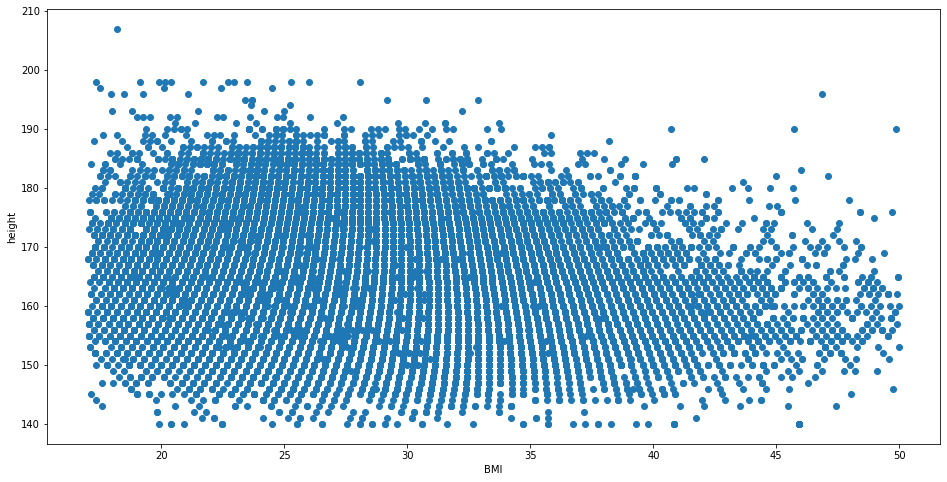

In [204]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(cardio_df['bmi'], cardio_df['height'])
ax.set_xlabel('BMI')
ax.set_ylabel('height')
plt.show()

- Based on the upperbound and lowerbound values we can filter the outliers

In [205]:
indexNames1 = cardio_df[ (cardio_df['height']<142.5)| (cardio_df['height']>187) |\
                         (cardio_df['weight']<40)| (cardio_df['weight']>108) |\
                         (cardio_df['systolic_BP']<90)|(cardio_df['systolic_BP']>170)|\
                         (cardio_df['diastolic_BP']<65)|(cardio_df['diastolic_BP']>105)|\
                         (cardio_df['bmi']>40)|(cardio_df['bmi']<17)].index
cardio_df.drop(indexNames1 , inplace=True)
cardio_df

,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio,ageinYears,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.97
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.93
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.51
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.71
5,1,151,67.0,120,80,2,2,0,0,0,0,60.0,29.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54.0,23.66
69994,1,165,80.0,150,80,1,1,0,0,1,1,58.0,29.38
69995,2,168,76.0,120,80,1,1,1,0,1,0,53.0,26.93
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.0,27.10


In [206]:
cardio_corr=cardio_df.drop(['cholesterol','gluc','smoke','alco','cardio','gender','active'],axis=1)
cardio_corr.corr().style.background_gradient(cmap='copper').set_precision(2)

,height,weight,systolic_BP,diastolic_BP,ageinYears,bmi
height,1,0.35,-0.0019,0.015,-0.091,-0.21
weight,0.35,1,0.23,0.21,0.052,0.84
systolic_BP,-0.0019,0.23,1,0.7,0.2,0.24
diastolic_BP,0.015,0.21,0.7,1,0.15,0.21
ageinYears,-0.091,0.052,0.2,0.15,1,0.11
bmi,-0.21,0.84,0.24,0.21,0.11,1


- BMI and weight have a high correlation, so weight can be dropped

- Using pd.get_dummies on categorical variable 'gender'

In [207]:
cardio_1 = pd.get_dummies(cardio_df,columns=['gender'],drop_first=True)
cardio_1

,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio,ageinYears,bmi,gender_2
0,168,62.0,110,80,1,1,0,0,1,0,50.0,21.97,1
1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.93,0
2,165,64.0,130,70,3,1,0,0,0,1,52.0,23.51,0
3,169,82.0,150,100,1,1,0,0,1,1,48.0,28.71,1
5,151,67.0,120,80,2,2,0,0,0,0,60.0,29.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,172,70.0,130,90,1,1,0,0,1,1,54.0,23.66,0
69994,165,80.0,150,80,1,1,0,0,1,1,58.0,29.38,0
69995,168,76.0,120,80,1,1,1,0,1,0,53.0,26.93,1
69998,163,72.0,135,80,1,2,0,0,0,1,61.0,27.10,0


### Assigning string values to numerical values of categorical columns

### for better visualisations

In [208]:
a={0:'No Disease',1:'Disease'}
b={0:'Female',1:'Male'}
c={1:'Normal', 2:'High', 3:'Very High'}
d={0:'Non Smoker',1:'Smoker'}
e={0:'Non Alcoholic',1:'Alcoholic'}
f={0:'Sedentary',1:'Active'}

cardio_1['cardio']=cardio_1['cardio'].map(a)
cardio_1['gender_2']=cardio_1['gender_2'].map(b)
cardio_1['gluc']=cardio_1['gluc'].map(c)
cardio_1['cholesterol']=cardio_1['cholesterol'].map(c)
cardio_1['smoke']=cardio_1['smoke'].map(d)
cardio_1['alco']=cardio_1['alco'].map(e)
cardio_1['active']=cardio_1['active'].map(f)

cardio_1

,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio,ageinYears,bmi,gender_2
0,168,62.0,110,80,Normal,Normal,Non Smoker,Non Alcoholic,Active,No Disease,50.0,21.97,Male
1,156,85.0,140,90,Very High,Normal,Non Smoker,Non Alcoholic,Active,Disease,55.0,34.93,Female
2,165,64.0,130,70,Very High,Normal,Non Smoker,Non Alcoholic,Sedentary,Disease,52.0,23.51,Female
3,169,82.0,150,100,Normal,Normal,Non Smoker,Non Alcoholic,Active,Disease,48.0,28.71,Male
5,151,67.0,120,80,High,High,Non Smoker,Non Alcoholic,Sedentary,No Disease,60.0,29.38,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,172,70.0,130,90,Normal,Normal,Non Smoker,Non Alcoholic,Active,Disease,54.0,23.66,Female
69994,165,80.0,150,80,Normal,Normal,Non Smoker,Non Alcoholic,Active,Disease,58.0,29.38,Female
69995,168,76.0,120,80,Normal,Normal,Smoker,Non Alcoholic,Active,No Disease,53.0,26.93,Male
69998,163,72.0,135,80,Normal,High,Non Smoker,Non Alcoholic,Sedentary,Disease,61.0,27.10,Female


### Coverting numerical data to categorical data

In [209]:
cardio_1['agegrps']=pd.cut(cardio_1.ageinYears,bins=[0,29,40,50,65,100],\
                            labels=['0-29 grp','30-40 grp','40-50 grp','50-65 grp','65+ grp'])
cardio_1['sysgrp']=pd.cut(cardio_1.systolic_BP,bins=[0,70,100,130,180,240],\
                            labels=['very_low','low','normal','high','extreme'])
cardio_1['diagrp']=pd.cut(cardio_1.diastolic_BP,bins=[0,40,70,90,100,200],\
                            labels=['very_low','low','normal','high','extreme'])
cardio_1['bmigrp']=pd.cut(cardio_1.bmi,bins=[0,18.5,24.9,29.9,50],\
                            labels=['underweight','normal','overweight','obese'])
#cardio_df2
cardio_1=cardio_1.drop(['systolic_BP','diastolic_BP','height','bmi','ageinYears'],axis=1)
cardio_1

,weight,cholesterol,gluc,smoke,alco,active,cardio,gender_2,agegrps,sysgrp,diagrp,bmigrp
0,62.0,Normal,Normal,Non Smoker,Non Alcoholic,Active,No Disease,Male,40-50 grp,normal,normal,normal
1,85.0,Very High,Normal,Non Smoker,Non Alcoholic,Active,Disease,Female,50-65 grp,high,normal,obese
2,64.0,Very High,Normal,Non Smoker,Non Alcoholic,Sedentary,Disease,Female,50-65 grp,normal,low,normal
3,82.0,Normal,Normal,Non Smoker,Non Alcoholic,Active,Disease,Male,40-50 grp,high,high,overweight
5,67.0,High,High,Non Smoker,Non Alcoholic,Sedentary,No Disease,Female,50-65 grp,normal,normal,overweight
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,70.0,Normal,Normal,Non Smoker,Non Alcoholic,Active,Disease,Female,50-65 grp,normal,normal,normal
69994,80.0,Normal,Normal,Non Smoker,Non Alcoholic,Active,Disease,Female,50-65 grp,high,normal,overweight
69995,76.0,Normal,Normal,Smoker,Non Alcoholic,Active,No Disease,Male,50-65 grp,normal,normal,overweight
69998,72.0,Normal,High,Non Smoker,Non Alcoholic,Sedentary,Disease,Female,50-65 grp,high,normal,overweight


## Heart Disease by Gender

cardio    Disease  No Disease
gender_2                     
Female      19753       20307
Male        10734       11110


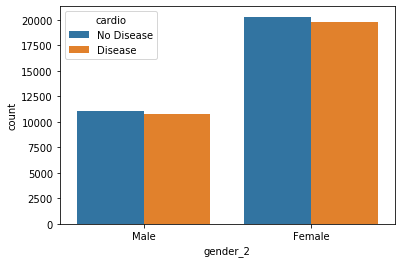

In [254]:
cto_n = pd.crosstab(cardio_1.gender_2,cardio_1.cardio)
print(cto_n)
sns.countplot(x='gender_2',hue='cardio',data=cardio_1)
plt.show()

In [211]:
from scipy.stats.contingency import chi2_contingency
cto = pd.crosstab(cardio_1.gender_2,cardio_1.cardio)
chi_2, p_val, dof, cte = chi2_contingency(cto)
print(chi_2, p_val, dof, cte)

0.15518745292272054 0.693626528308628 1 [[19729.08 20330.92]
 [10757.92 11086.08]]


cardio    Disease  No Disease
gender_2                     
Female      49.31       50.69
Male        49.14       50.86


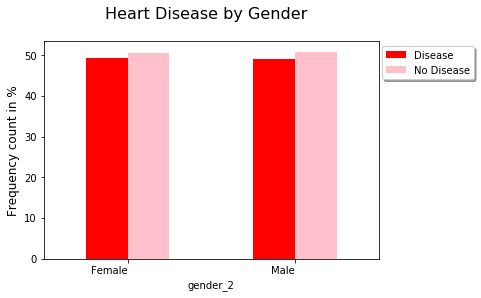

In [212]:
cto_n = pd.crosstab(cardio_1.gender_2,cardio_1.cardio,normalize='index')\
.round(4)*100
print(cto_n)
cto_n.plot.bar(stacked=False,color = ['red','pink'])#,title='Distribution by Gender \n 1=Female , 2=Male')
ax = plt.subplot(111)
ax.legend()
plt.suptitle('Heart Disease by Gender',fontsize=16, y=1.0)
plt.ylabel('Frequency count in %',fontsize=12)
#plt.xlabel('Gender (1=Female,2=Male)',fontsize=12)
plt.xticks(rotation=0, ha='right')
#plt.title('Cardio(0=No Disease,1=Disease)',fontsize=12)
ax.legend(bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

## Heart Disease by Cholesterol level

In [213]:
cto_1 = pd.crosstab(cardio_1.cholesterol,cardio_1.cardio)
chi_2, p_val, dof, cte = chi2_contingency(cto_1)
print(chi_2, p_val, dof, cte)

2926.452056926021 0.0 2 [[ 3998.02  4119.98]
 [23076.04 23779.96]
 [ 3412.94  3517.06]]


cardio       Disease  No Disease
cholesterol                     
High           59.37       40.63
Normal         43.54       56.46
Very High      75.99       24.01


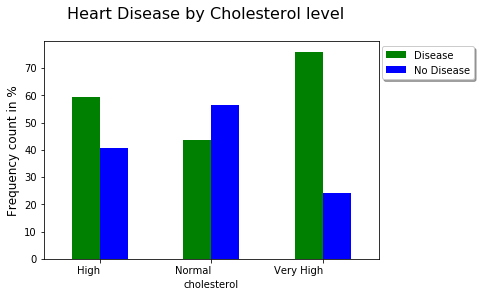

In [214]:
cto_1_n = pd.crosstab(cardio_1.cholesterol,cardio_1.cardio,normalize='index')\
.round(4)*100
print(cto_1_n)
cto_1_n.plot.bar(stacked=False,color = ['green','blue'])#,title='Distribution by Gender \n 1=Female , 2=Male')
ax = plt.subplot(111)
ax.legend()
plt.suptitle('Heart Disease by Cholesterol level',fontsize=16, y=1.0)
plt.ylabel('Frequency count in %',fontsize=12)
#plt.xlabel('Gender (1=Female,2=Male)',fontsize=12)
plt.xticks(rotation=0, ha='right')
#plt.title('Cardio(0=No Disease,1=Disease)',fontsize=12)
ax.legend(bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

## Heart Disease by BloodGlucose level

In [215]:
cto_2 = pd.crosstab(cardio_1.gluc,cardio_1.cardio)
chi_2, p_val, dof, cte = chi2_contingency(cto_2)
print(chi_2, p_val, dof, cte)

464.2970914711733 1.5106630445671543e-101 2 [[ 2138.38  2203.62]
 [26069.87 26865.13]
 [ 2278.74  2348.26]]


cardio     Disease  No Disease
gluc                          
High         57.81       42.19
Normal       47.49       52.51
Very High    61.36       38.64


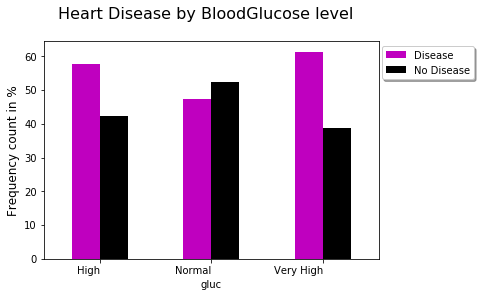

In [216]:
cto_2_n = pd.crosstab(cardio_1.gluc,cardio_1.cardio,normalize='index')\
.round(4)*100
print(cto_2_n)
cto_2_n.plot.bar(stacked=False,color = ['m','k'])#,title='Distribution by Gender \n 1=Female , 2=Male')
ax = plt.subplot(111)
ax.legend()
plt.suptitle('Heart Disease by BloodGlucose level',fontsize=16, y=1.0)
plt.ylabel('Frequency count in %',fontsize=12)
#plt.xlabel('Gender (1=Female,2=Male)',fontsize=12)
plt.xticks(rotation=0, ha='right')
#plt.title('Cardio(0=No Disease,1=Disease)',fontsize=12)
ax.legend(bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

## Heart Disease by Smoking Status

In [217]:
cto_3 = pd.crosstab(cardio_1.smoke,cardio_1.cardio)
chi_2, p_val, dof, cte = chi2_contingency(cto_3)
print(chi_2, p_val, dof, cte)

25.825378594820855 3.737418351820072e-07 1 [[27826.09 28674.91]
 [ 2660.91  2742.09]]


cardio      Disease  No Disease
smoke                          
Non Smoker    49.57       50.43
Smoker        45.94       54.06


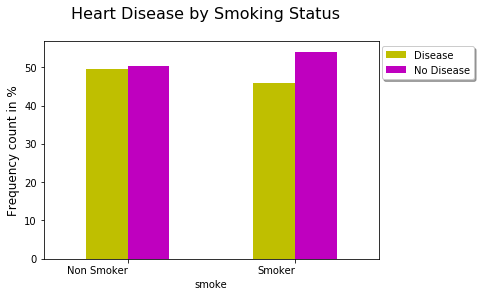

In [218]:
cto_3_n = pd.crosstab(cardio_1.smoke,cardio_1.cardio,normalize='index')\
.round(4)*100
print(cto_3_n)
cto_3_n.plot.bar(stacked=False,color = ['y','m'])#,title='Distribution by Gender \n 1=Female , 2=Male')
ax = plt.subplot(111)
ax.legend()
plt.suptitle('Heart Disease by Smoking Status',fontsize=16, y=1.0)
plt.ylabel('Frequency count in %',fontsize=12)
#plt.xlabel('Gender (1=Female,2=Male)',fontsize=12)
plt.xticks(rotation=0, ha='right')
#plt.title('Cardio(0=No Disease,1=Disease)',fontsize=12)
ax.legend(bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

## Heart Disease by Alcohol consumption

In [219]:
cto_4 = pd.crosstab(cardio_1.alco,cardio_1.cardio)
chi_2, p_val, dof, cte = chi2_contingency(cto_4)
print(chi_2, p_val, dof, cte)

9.64675466599318 0.0018968641405321775 1 [[ 1598.62  1647.38]
 [28888.38 29769.62]]


cardio         Disease  No Disease
alco                              
Alcoholic        46.58       53.42
Non Alcoholic    49.40       50.60


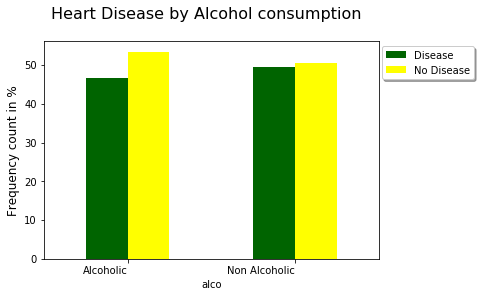

In [220]:
cto_4_n = pd.crosstab(cardio_1.alco,cardio_1.cardio,normalize='index')\
.round(4)*100
print(cto_4_n)
cto_4_n.plot.bar(stacked=False,color=['darkgreen','yellow'])#,title='Distribution by Gender \n 1=Female , 2=Male')
ax = plt.subplot(111)
ax.legend()
plt.suptitle('Heart Disease by Alcohol consumption',fontsize=16, y=1.0)
plt.ylabel('Frequency count in %',fontsize=12)
#plt.xlabel('Gender (1=Female,2=Male)',fontsize=12)
plt.xticks(rotation=0, ha='right')
#plt.title('Cardio(0=No Disease,1=Disease)',fontsize=12)
ax.legend(bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

## Heart Disease by level of Physical Activity

In [222]:
cto_5 = pd.crosstab(cardio_1.active,cardio_1.cardio)
chi_2, p_val, dof, cte = chi2_contingency(cto_5)
print(chi_2, p_val, dof, cte)

83.51789897455645 6.314167579896643e-20 1 [[24520.5 25268.5]
 [ 5966.5  6148.5]]


cardio     Disease  No Disease
active                        
Active       48.34       51.66
Sedentary    52.98       47.02


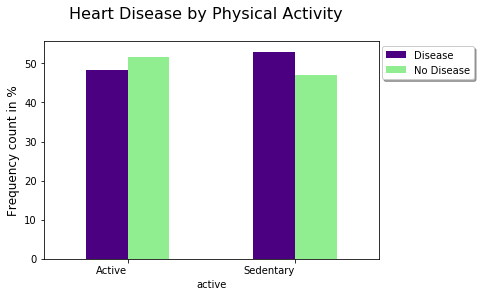

In [256]:
cto_5_n = pd.crosstab(cardio_1.active,cardio_1.cardio,normalize='index')\
.round(4)*100
print(cto_5_n)
cto_5_n.plot.bar(stacked=False,color=['indigo','lightgreen'])#,title='Distribution by Gender \n 1=Female , 2=Male')
ax = plt.subplot(111)
ax.legend()
plt.suptitle('Heart Disease by Physical Activity',fontsize=16, y=1.0)
plt.ylabel('Frequency count in %',fontsize=12)
#plt.xlabel('Gender (1=Female,2=Male)',fontsize=12)
plt.xticks(rotation=0, ha='right')
#plt.title('Cardio(0=No Disease,1=Disease)',fontsize=12)
ax.legend(bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

## Heart Disease by Age Group

In [224]:
cto_6 = pd.crosstab(cardio_1.agegrps,cardio_1.cardio)
chi_2, p_val, dof, cte = chi2_contingency(cto_6)
print(chi_2, p_val, dof, cte)

2338.1315396601494 0.0 2 [[ 1333.17  1373.83]
 [ 9071.14  9347.86]
 [20082.69 20695.31]]


In [225]:
cto_6

cardio,Disease,No Disease
agegrps,,
30-40 grp,602,2105
40-50 grp,7109,11310
50-65 grp,22776,18002


cardio     Disease  No Disease
agegrps                       
30-40 grp    22.24       77.76
40-50 grp    38.60       61.40
50-65 grp    55.85       44.15


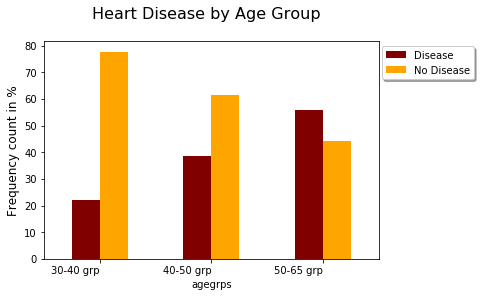

In [226]:
cto_6_n = pd.crosstab(cardio_1.agegrps,cardio_1.cardio,normalize='index')\
.round(4)*100
print(cto_6_n)
cto_6_n.plot.bar(stacked=False,color=['maroon','orange'])#,title='Distribution by Gender \n 1=Female , 2=Male')
ax = plt.subplot(111)
ax.legend()
plt.suptitle('Heart Disease by Age Group',fontsize=16, y=1.0)
plt.ylabel('Frequency count in %',fontsize=12)
#plt.xlabel('Gender (1=Female,2=Male)',fontsize=12)
plt.xticks(rotation=0, ha='right')
#plt.title('Cardio(0=No Disease,1=Disease)',fontsize=12)
ax.legend(bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

## Heart Disease by Systolic BP

In [227]:
cto_7 = pd.crosstab(cardio_1.sysgrp,cardio_1.cardio)
chi_2, p_val, dof, cte = chi2_contingency(cto_7)
print(chi_2, p_val, dof, cte)

10505.471698284497 0.0 2 [[  932.28   960.72]
 [21555.72 22213.28]
 [ 7999.    8243.  ]]


cardio  Disease  No Disease
sysgrp                     
low       18.49       81.51
normal    37.93       62.07
high      83.33       16.67


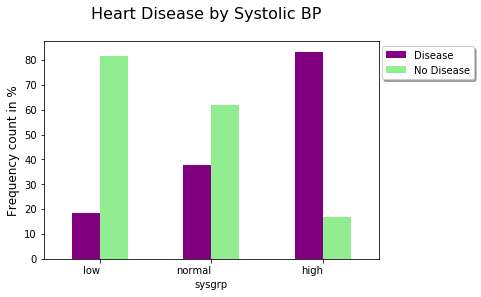

In [228]:
cto_7_n = pd.crosstab(cardio_1.sysgrp,cardio_1.cardio,normalize='index')\
.round(4)*100
print(cto_7_n)
cto_7_n.plot.bar(stacked=False,color=['purple','lightgreen'])#,title='Distribution by Gender \n 1=Female , 2=Male')
ax = plt.subplot(111)
ax.legend()
plt.suptitle('Heart Disease by Systolic BP',fontsize=16, y=1.0)
plt.ylabel('Frequency count in %',fontsize=12)
#plt.xlabel('Gender (1=Female,2=Male)',fontsize=12)
plt.xticks(rotation=0, ha='right')
#plt.title('Cardio(0=No Disease,1=Disease)',fontsize=12)
ax.legend(bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

## Heart Disease by Diastolic BP

In [229]:
cto_8 = pd.crosstab(cardio_1.diagrp,cardio_1.cardio)
chi_2, p_val, dof, cte = chi2_contingency(cto_8)
print(chi_2, p_val, dof, cte)

3430.8018246400547 0.0 3 [[5.00e+03 5.15e+03]
 [2.37e+04 2.44e+04]
 [1.78e+03 1.83e+03]
 [1.38e+01 1.42e+01]]


cardio   Disease  No Disease
diagrp                      
low        28.61       71.39
normal     51.06       48.94
high       82.82       17.18
extreme    75.00       25.00


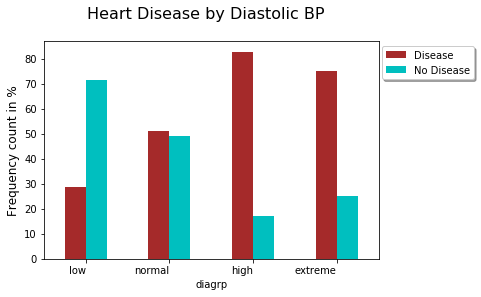

In [230]:
cto_8_n = pd.crosstab(cardio_1.diagrp,cardio_1.cardio,normalize='index')\
.round(4)*100
print(cto_8_n)
cto_8_n.plot.bar(stacked=False,color=['brown','c'])#,title='Distribution by Gender \n 1=Female , 2=Male')
ax = plt.subplot(111)
ax.legend()
plt.suptitle('Heart Disease by Diastolic BP',fontsize=16, y=1.0)
plt.ylabel('Frequency count in %',fontsize=12)
#plt.xlabel('Gender (1=Female,2=Male)',fontsize=12)
plt.xticks(rotation=0, ha='right')
#plt.title('Cardio(0=No Disease,1=Disease)',fontsize=12)
ax.legend(bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

## Heart Disease by BMI

In [231]:
cto_9 = pd.crosstab(cardio_1.bmigrp,cardio_1.cardio)
chi_2, p_val, dof, cte = chi2_contingency(cto_9)
print(chi_2, p_val, dof, cte)

1630.7496472359985 0.0 3 [[  185.67   191.33]
 [11157.32 11497.68]
 [11838.44 12199.56]
 [ 7305.57  7528.43]]


cardio       Disease  No Disease
bmigrp                          
underweight    30.77       69.23
normal         40.37       59.63
overweight     50.53       49.47
obese          61.20       38.80


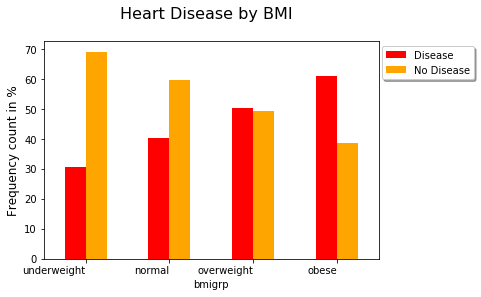

In [232]:
cto_9_n = pd.crosstab(cardio_1.bmigrp,cardio_1.cardio,normalize='index')\
.round(4)*100
print(cto_9_n)
cto_9_n.plot.bar(stacked=False,color=['red','orange',])#,title='Distribution by Gender \n 1=Female , 2=Male')
ax = plt.subplot(111)
ax.legend()
plt.suptitle('Heart Disease by BMI',fontsize=16, y=1.0)
plt.ylabel('Frequency count in %',fontsize=12)
#plt.xlabel('Gender (1=Female,2=Male)',fontsize=12)
plt.xticks(rotation=0, ha='right')
#plt.title('Cardio(0=No Disease,1=Disease)',fontsize=12)
ax.legend(bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.show()

In [233]:
cardio_df2=cardio_df
cardio_df2

,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio,ageinYears,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.97
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.93
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.51
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.71
5,1,151,67.0,120,80,2,2,0,0,0,0,60.0,29.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54.0,23.66
69994,1,165,80.0,150,80,1,1,0,0,1,1,58.0,29.38
69995,2,168,76.0,120,80,1,1,1,0,1,0,53.0,26.93
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.0,27.10


## Preparing the dataset for machine learning models

In [234]:
cardio_df2 = pd.get_dummies(cardio_df2,columns=['gender'],drop_first=True)
cardio_df2

,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio,ageinYears,bmi,gender_2
0,168,62.0,110,80,1,1,0,0,1,0,50.0,21.97,1
1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.93,0
2,165,64.0,130,70,3,1,0,0,0,1,52.0,23.51,0
3,169,82.0,150,100,1,1,0,0,1,1,48.0,28.71,1
5,151,67.0,120,80,2,2,0,0,0,0,60.0,29.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,172,70.0,130,90,1,1,0,0,1,1,54.0,23.66,0
69994,165,80.0,150,80,1,1,0,0,1,1,58.0,29.38,0
69995,168,76.0,120,80,1,1,1,0,1,0,53.0,26.93,1
69998,163,72.0,135,80,1,2,0,0,0,1,61.0,27.10,0


- From Chi-Square Independence Test for variable 'gender_2' and variable 'cardio' there is no relationship between them
- Also from the correlation matrix weight and BMI have high correlation
- So, gender_2 and weight can be dropped before we use the dataset for building models

In [235]:
cardio_df2=cardio_df2.drop(['gender_2','weight'],axis=1)
cardio_df2

,height,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio,ageinYears,bmi
0,168,110,80,1,1,0,0,1,0,50.0,21.97
1,156,140,90,3,1,0,0,1,1,55.0,34.93
2,165,130,70,3,1,0,0,0,1,52.0,23.51
3,169,150,100,1,1,0,0,1,1,48.0,28.71
5,151,120,80,2,2,0,0,0,0,60.0,29.38
...,...,...,...,...,...,...,...,...,...,...,...
69993,172,130,90,1,1,0,0,1,1,54.0,23.66
69994,165,150,80,1,1,0,0,1,1,58.0,29.38
69995,168,120,80,1,1,1,0,1,0,53.0,26.93
69998,163,135,80,1,2,0,0,0,1,61.0,27.10


## Creating  Features array and Target array

In [236]:
X = cardio_df2.drop('cardio',axis=1)
y = cardio_df2.iloc[:,-3]

# Logistic Regression

In [237]:
#preprocessing
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

### Parameter tuning using GridSearchCV

In [238]:
param_dict = {
               'C':[0.001,0.01,0.1,1,10,100,1000]
                                  
              }
clf = GridSearchCV(LogisticRegression(),param_dict,cv=4)
clf.fit(X_scaled,y)
clf.best_params_
clf.best_score_
print(clf.best_params_,clf.best_score_)

{'C': 0.1} 0.7227158180408374


### Simple Train/Test split cross-validation

In [240]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


#preprocessing
#sc.fit(X_train)
X_train = sc.fit_transform(X_train)

#training the model
model = LogisticRegression(C=0.1)
model.fit(X_train,y_train)
model.intercept_
model.coef_

#test the model
X_test = sc.transform(X_test)
y_pred = model.predict(X_test) 

#performance measures
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
tpr = recall_score(y_test,y_pred)
print("Confusion Matrix")
print(cm,"\n")
print("Classification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[6267 1645]
 [2691 4873]] 

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      7912
           1       0.75      0.64      0.69      7564

    accuracy                           0.72     15476
   macro avg       0.72      0.72      0.72     15476
weighted avg       0.72      0.72      0.72     15476



### k-fold cross-validation for k=4 

In [241]:
model = LogisticRegression(C=0.1)
model.fit(X_scaled,y)
model.intercept_
model.coef_
scores = cross_val_score(model,X_scaled,y,cv=4,scoring='accuracy')
scores.mean()
print('Accuracy score:',scores.mean()) #accuracy
scores_precision=cross_val_score(model,X_scaled,y,cv=4,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision'''
scores_recall=cross_val_score(model,X_scaled,y,cv=4,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Accuracy score: 0.7227158164144833
Precision: 0.7261159694914037
Recall: 0.7217126281713739


# KNN classification

### Parameter tuning using GridSearchCV

In [242]:
from sklearn.neighbors import KNeighborsClassifier

X = cardio_df2.drop('cardio',axis=1)
y = cardio_df2.iloc[:,-3]

sc=StandardScaler()
X_scaled=sc.fit_transform(X)

param_dict = {
                'n_neighbors':range(1,11)
                                  
                 }
clf = GridSearchCV(KNeighborsClassifier(),param_dict,cv=4)
clf.fit(X_scaled,y)
clf.best_params_
clf.best_score_
print(clf.best_params_,clf.best_score_)

{'n_neighbors': 10} 0.7094210390281727


### Simple Train/Test split cross-validation

In [243]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)


accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')

cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm,"\n")
print("Classification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[6215 1697]
 [2806 4758]] 

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.79      0.73      7912
           1       0.74      0.63      0.68      7564

    accuracy                           0.71     15476
   macro avg       0.71      0.71      0.71     15476
weighted avg       0.71      0.71      0.71     15476



### k-fold cross-validation k=4

In [244]:
model = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(model,X_scaled,y,cv=4,scoring='accuracy')
scores.mean()
print('Accuracy score:',scores.mean()) #accuracy
scores_precision=cross_val_score(model,X_scaled,y,cv=4,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision'''
scores_recall=cross_val_score(model,X_scaled,y,cv=4,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Accuracy score: 0.7094210405067499
Precision: 0.7133721686878078
Recall: 0.708306846811663


# Random Forest Classifier

In [245]:
from sklearn.ensemble import RandomForestClassifier
X = cardio_df2.drop('cardio',axis=1)
y = cardio_df2.iloc[:,-3]

### Parameter tuning using GridSearchCV

In [246]:
param_dict= { 'n_estimators': range(10,111,10)}
clf = GridSearchCV(RandomForestClassifier(),param_dict,cv=4)
clf.fit(X,y)
clf.best_params_
clf.best_score_
print(clf.best_params_,clf.best_score_)
#{'n_estimators': 90} 0.6854655508493207

{'n_estimators': 70} 0.6993247609201344


### Simple Train/Test split cross-validation

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
rfc=RandomForestClassifier(n_estimators=70,random_state=0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm,"\n")
print("Classification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[5679 2233]
 [2473 5091]] 

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      7912
           1       0.70      0.67      0.68      7564

    accuracy                           0.70     15476
   macro avg       0.70      0.70      0.70     15476
weighted avg       0.70      0.70      0.70     15476



### k-fold cross-validation k=4

In [248]:
model = RandomForestClassifier(n_estimators=70,random_state=0)
scores = cross_val_score(model,X,y,cv=4,scoring='accuracy')
scores.mean()
print('Accuracy score:',scores.mean()) #accuracy
scores_precision=cross_val_score(model,X,y,cv=4,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision'''
scores_recall=cross_val_score(model,X,y,cv=4,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Accuracy score: 0.6990823285341232
Precision: 0.6990932971273253
Recall: 0.6988513888582244


# AdaBoost Classifier

In [249]:
from sklearn.ensemble import AdaBoostClassifier
X = cardio_df2.drop('cardio',axis=1)
y = cardio_df2.iloc[:,-3]

### Parameter tuning using GridSearchCV

In [250]:
param_dict= { 'n_estimators': range(10,111,10)}

clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5)),param_dict,cv=4)
clf.fit(X,y)
clf.best_params_
clf.best_score_
print(clf.best_params_,clf.best_score_) #{'n_estimators': 10} 0.7293312423971509

{'n_estimators': 10} 0.7275620315326958


### Simple Train/Test split cross-validation

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=10,random_state=0)
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm,"\n")
print("Classification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[6255 1657]
 [2598 4966]] 

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7912
           1       0.75      0.66      0.70      7564

    accuracy                           0.73     15476
   macro avg       0.73      0.72      0.72     15476
weighted avg       0.73      0.73      0.72     15476



### k-fold cross-validation k=4

In [252]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=10,random_state=0)
scores = cross_val_score(model,X,y,cv=4,scoring='accuracy')
scores.mean()
print('Accuracy score:',scores.mean()) #accuracy
scores_precision=cross_val_score(model,X,y,cv=4,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision
scores_recall=cross_val_score(model,X,y,cv=4,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Accuracy score: 0.727610531719092
Precision: 0.7307476336355715
Recall: 0.7266591946297916


- The order of the machine learning models in order of accuracy are Adaboost(73%)> Logistic Regression(72%)> KNN(71%) >Random Forest(70%). In terms of accuracy Adaboost is the best among these four models.
- The order of machine learning models in order of False Negative Rate: KNN(35%), Adaboost(33%), Logistic Regression(33%), Random Forest(30%). In terms of FNR Random Forest is the best among these four models.
